In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from hcga.io import save_dataset
from hcga.graph import Graph, GraphCollection

if not Path("datasets").exists():
    os.mkdir("datasets")
if not Path("results").exists():
    os.mkdir("results")


# Generate labelled random graphs

In [2]:
# defining number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3

# empty list of graphs and labels
graphs = []
labels = []
node_features = []

# setting probability of edge existing for random graphs
p = 0.6

# setting number of edges to add per node
m = 4

In [3]:
# adding 50 random graphs (label 0)
for i in range(num_g):
    
    g = nx.fast_gnp_random_graph(n, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(0)

In [4]:
# adding 50 powerlaw cluster graphs (label 1)
for i in range(num_g):
    
    g = nx.powerlaw_cluster_graph(n, m, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(1)

In [5]:
# adding 50 watts strogatz graphs (label 2)
for i in range(num_g):
    
    g = nx.watts_strogatz_graph(n, m, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(2)

In [6]:
# create graph collection object
g_c = GraphCollection()

# add graphs, node features and labels to the object
g_c.add_graph_list(graphs, node_features, labels)

In [7]:
# perform some sanity checks

print("There are {} graphs".format(len(g_c.graphs)))
print("There are {} features per node".format(g_c.get_n_node_features()))

There are 150 graphs
There are 3 features per node


In [8]:
# we can save this if we want to and run everything from the command line

save_dataset(
    g_c,
    "labelled_graph_dataset",
    folder="./datasets/labelled_graph",
)

## Extracting features and generate feature matrix

In [9]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [10]:
# load previously saved dataset
h.load_data(
    "./datasets/labelled_graph/labelled_graph_dataset.pkl"
)

In [11]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/labelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.36it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [12:47<00:00,  5.12s/it]
INFO:hcga.extraction:1264 feature extracted.


In [12]:
h.features

feature_class         Cns                                           EF  \
feature_name  connectance connectance_N connectance_E local_efficiency   
0                0.599798      0.005998      0.000202         0.800517   
1                0.605253      0.006053      0.000202         0.804603   
2                0.587273      0.005873      0.000202         0.794064   
3                0.606869      0.006069      0.000202         0.803079   
4                0.603636      0.006036      0.000202         0.802876   
..                    ...           ...           ...              ...   
145              0.040404      0.000404      0.000202         0.086976   
146              0.040404      0.000404      0.000202         0.065762   
147              0.040404      0.000404      0.000202         0.059500   
148              0.040404      0.000404      0.000202         0.063520   
149              0.040404      0.000404      0.000202         0.059619   

feature_class                                                          \
feature_name  global_efficiency local_efficiency_N local_efficiency_E   
0                      0.799899           0.008005           0.000270   
1                      0.802626           0.008046           0.000269   
2                      0.793636           0.007941           0.000273   
3                      0.803434           0.008031           0.000267   
4                      0.801818           0.008029           0.000269   
..                          ...                ...                ...   
145                    0.326572           0.000870           0.000435   
146                    0.323323           0.000658           0.000329   
147                    0.327313           0.000595           0.000298   
148                    0.327112           0.000635           0.000318   
149                    0.327697           0.000596           0.000298   

feature_class                                                    RC  ...  \
feature_name  global_efficiency_N global_efficiency_E rich_club_k_1  ...   
0                        0.007999            0.000269      0.599798  ...   
1                        0.008026            0.000268      0.605253  ...   
2                        0.007936            0.000273      0.587273  ...   
3                        0.008034            0.000267      0.606869  ...   
4                        0.008018            0.000268      0.603636  ...   
..                            ...                 ...           ...  ...   
145                      0.003266            0.001633      0.040404  ...   
146                      0.003233            0.001617      0.040404  ...   
147                      0.003273            0.001637      0.040404  ...   
148                      0.003271            0.001636      0.040404  ...   
149                      0.003277            0.001638      0.040404  ...   

feature_class                 DM                                        \
feature_name  eccentricity_min_E eccentricity_sum_N eccentricity_sum_E   
0                       0.000674               2.00           0.067363   
1                       0.000668               2.00           0.066756   
2                       0.000688               2.00           0.068799   
3                       0.000666               2.00           0.066578   
4                       0.000669               2.00           0.066934   
..                           ...                ...                ...   
145                     0.025000               5.48           2.740000   
146                     0.025000               5.48           2.740000   
147                     0.025000               5.32           2.660000   
148                     0.020000               5.52           2.760000   
149                     0.025000               5.37           2.685000   

feature_class                                                              \
feature_name  eccentricity_max_N eccentricity_max_E eccent

## Classification and analysis

In [13]:
# load the saved features

h.load_features("./results/labelled_graph/features.pkl")

In [14]:
# implement a classification analyse of the features

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
h.analyse_features(
    compute_shap=False,
    model=model,
    feature_file="./results/labelled_graph/features.pkl",
    results_folder="./results/labelled_graph",
    save_model = True, # save the trained model
    plot=False,
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:957 valid features
INFO:hcga.analysis:957 with interpretability 1
INFO:hcga.analysis:Counts of graphs/label: 
label
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Accuracy: 1.0 +/- 0.0
INFO:hcga.analysis:Fitting model to all data


In [15]:
accuracy_matrix, top_features = h.pairwise_classification(
    feature_file="./results/labelled_graph/features.pkl"
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:957 valid features
INFO:hcga.analysis:957 with interpretability 1
INFO:hcga.analysis:... Using Xgboost classifier ...
  0%|          | 0/3 [00:00<?, ?it/s]INFO:hcga.analysis:Pairwise classification between classes 0.0 and 1.0
INFO:hcga.analysis:Counts of graphs/label: 
label
0    50
1    50
Name: count, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.9 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Accuracy: 0.99 +/- 0.03
 3

In [16]:
# find top features pairwisely
print(top_features[(0.0, 1.0)])
print(top_features[(0.0, 2.0)])
print(top_features[(1.0, 2.0)])

['CM_communities_weighted_coverage_N', 'CM_communities_weighted_coverage_E', 'CM_communities_weighted_performance_N', 'CM_communities_performance_N', 'Cns_connectance']
['CM_communities_weighted_coverage_N', 'CM_communities_weighted_coverage_E', 'CM_communities_weighted_performance_N', 'CM_communities_performance_N', 'Cns_connectance']
['CM_communities_weighted_coverage_N', 'CM_communities_weighted_coverage_E', 'CM_communities_weighted_performance_N', 'CM_communities_performance_N', 'Cns_connectance']


# Generate unlabelled random graphs
Here we need to restart the kernel to ensure the extract feature step run successfully.

In [2]:
# defining limits on number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting limits on probability of edge existing for random graphs
p = 0.6

# adding 20 random graphs (label 0)
for i in range(num_g):

    g = nx.fast_gnp_random_graph(n, p)

    node_feat_matrix = np.random.random((n, n_nf))

    for i, node in enumerate(g.nodes):
        g.nodes[node]["features"] = node_feat_matrix[i, :]

    # graphs.append(g)

    graphs.append(nx.to_numpy_array(g) * 2)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 20 powerlaw cluster graphs (label 1)
for i in range(num_g):

    g = nx.powerlaw_cluster_graph(n, m, p)

    node_feat_matrix = np.random.random((n, n_nf))

    for i, node in enumerate(g.nodes):
        g.nodes[node]["features"] = node_feat_matrix[i, :]

    # graphs.append(g)

    graphs.append(nx.to_numpy_array(g) * 2)
    node_features.append(node_feat_matrix)


# adding 20 watts strogatz graphs (label 2)
for i in range(num_g):

    g = nx.watts_strogatz_graph(n, m, p)

    node_feat_matrix = np.random.random((n, n_nf))

    for i, node in enumerate(g.nodes):
        g.nodes[node]["features"] = node_feat_matrix[i, :]

    # graphs.append(g)

    graphs.append(nx.to_numpy_array(g) * 2)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_unlabelled = GraphCollection()
graphs_unlabelled.add_graph_list(graphs, node_features)  # loaded without the labels

# save the unlabelled dataset
save_dataset(
    graphs_unlabelled, "unlabelled_graph_dataset", folder="./datasets/unlabelled_graph"
)

# perform some sanity checks
print(
    "There are {} graphs in the unlabelled dataset".format(
        len(graphs_unlabelled.graphs)
    )
)
print("There are {} features per node".format(graphs_unlabelled.get_n_node_features()))

There are 150 graphs in the unlabelled dataset
There are 3 features per node


## Extracting features and generate feature matrix

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/unlabelled_graph/unlabelled_graph_dataset.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/unlabelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.89it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [15:03<00:00,  6.03s/it]
INFO:hcga.extraction:1264 feature extracted.


## Analyse by kNN trained model

In [8]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_test",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:956 valid features
INFO:hcga.analysis:956 with interpretability 1


## Analyse by Hierarchical Clustering

In [9]:
# substitute None terms in feature matrix with 0
h_dropped = h.features.fillna(0)

# do Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(h_dropped)

print(clustering.labels_)

[1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


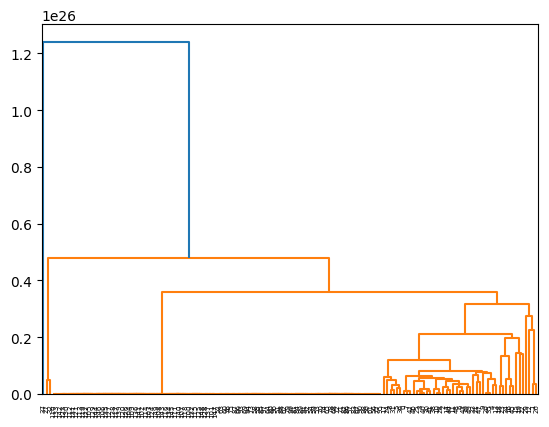

In [10]:
# visuliasation
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_data = linkage(h_dropped)

%matplotlib inline
dendrogram(linkage_data)
plt.show()

## Analyse by UMAP

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<Axes: >

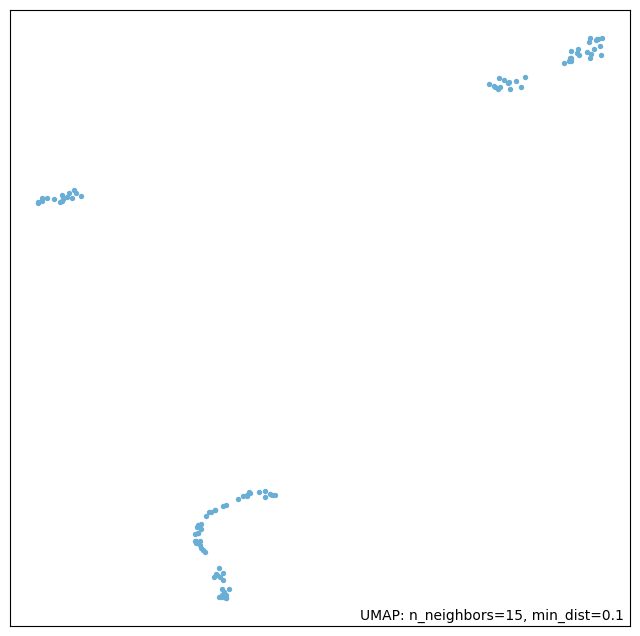

In [12]:
from umap import UMAP, plot
map = UMAP().fit(h_dropped)

%matplotlib inline
plot.points(map)